# Step 1: Data collection and preparation

In [8]:
import yfinance as yf
import pandas as pd
# “Switched to ETH-USD due to 404 error with ETH-USDT”)
# Download ETH-USD data
data = yf.download("ETH-USD", start="2020-01-01", end="2025-05-19", interval="1d", auto_adjust=False)
data.to_csv("eth_usd_data.csv")  # Save for documentation
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker         ETH-USD     ETH-USD     ETH-USD     ETH-USD     ETH-USD   
Date                                                                     
2020-01-01  130.802002  130.802002  132.835358  129.198288  129.630661   
2020-01-02  127.410179  127.410179  130.820038  126.954910  130.820038   
2020-01-03  134.171707  134.171707  134.554016  126.490021  127.411263   
2020-01-04  135.069366  135.069366  136.052719  133.040558  134.168518   
2020-01-05  136.276779  136.276779  139.410202  135.045624  135.072098   

Price            Volume  
Ticker          ETH-USD  
Date                     
2020-01-01   7935230330  
2020-01-02   8032709256  
2020-01-03  10476845358  
2020-01-04   7430904515  
2020-01-05   7526675353  


# verify ticker availability

In [12]:
data_btc = yf.download("BTC-USD", start="2020-01-01", end="2025-05-19", interval="1d")
print(data_btc.head())

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095


In [12]:
# Select relevant columns
df = data[["Open", "Close", "High", "Low", "Volume"]].copy()
df.index = pd.to_datetime(df.index)  # Ensure datetime index

# Check for missing values
print(df.isna().sum())
df = df.dropna()  # Drop missing values if any

# Verify data
print(df.info())
print(df.describe())

Price   Ticker 
Open    ETH-USD    0
Close   ETH-USD    0
High    ETH-USD    0
Low     ETH-USD    0
Volume  ETH-USD    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1965 entries, 2020-01-01 to 2025-05-18
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Open, ETH-USD)    1965 non-null   float64
 1   (Close, ETH-USD)   1965 non-null   float64
 2   (High, ETH-USD)    1965 non-null   float64
 3   (Low, ETH-USD)     1965 non-null   float64
 4   (Volume, ETH-USD)  1965 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 92.1 KB
None
Price          Open        Close         High          Low        Volume
Ticker      ETH-USD      ETH-USD      ETH-USD      ETH-USD       ETH-USD
count   1965.000000  1965.000000  1965.000000  1965.000000  1.965000e+03
mean    2010.690726  2011.710005  2064.936256  1951.253709  1.707932e+10
std     1124.868517  1123.783933  1155.175420  1089.866405

# Step 2: Exploratory Data Analysis (EDA)

In [19]:
# 1. Visualize Price Trends:
# Plot the closing price and rolling averages to identify trends and volatility.

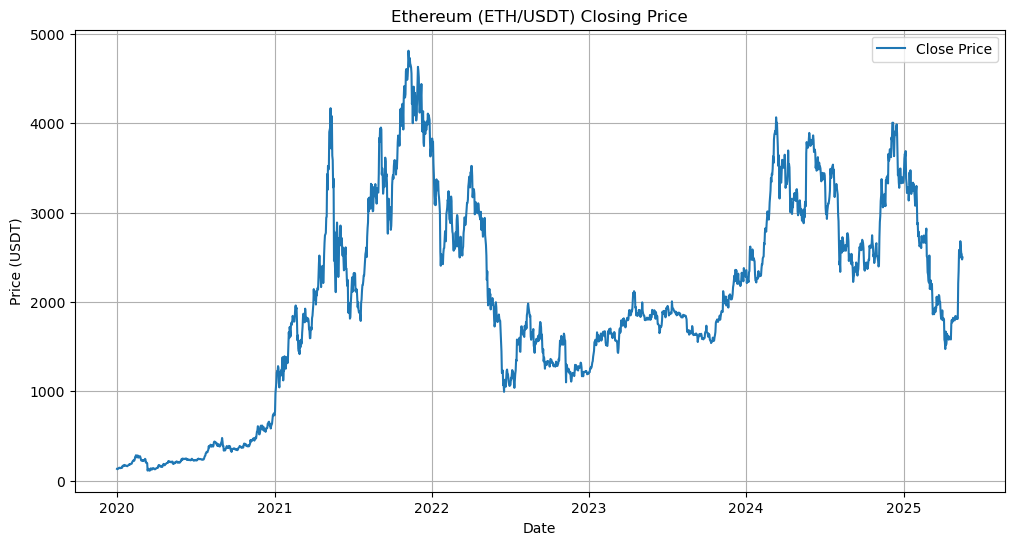

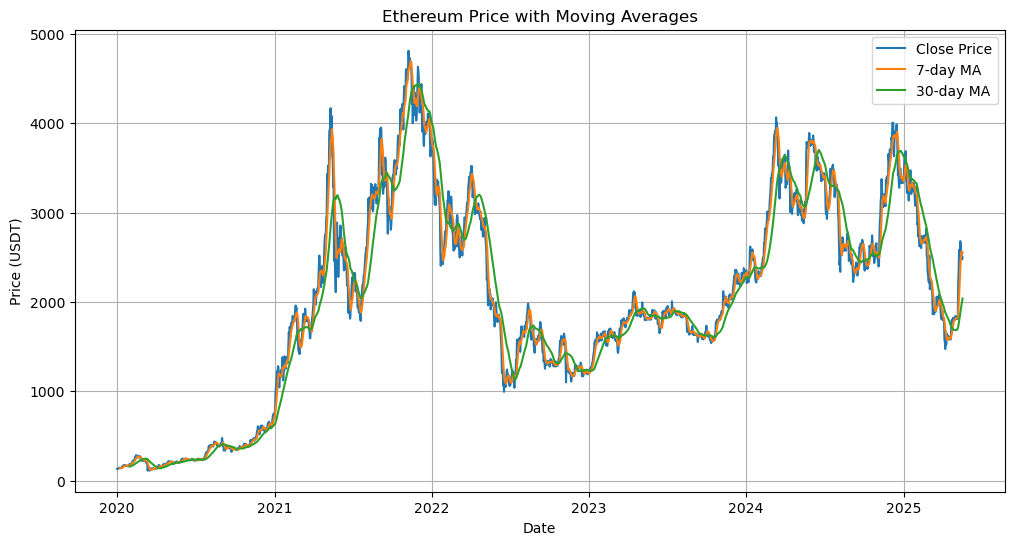

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price")
plt.title("Ethereum (ETH/USDT) Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.legend()
plt.grid(True)
plt.savefig("close_price.png")  # Save for report
plt.show()

# Plot rolling averages (7-day and 30-day)
df["7d_MA"] = df["Close"].rolling(window=7).mean()
df["30d_MA"] = df["Close"].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price")
plt.plot(df["7d_MA"], label="7-day MA")
plt.plot(df["30d_MA"], label="30-day MA")
plt.title("Ethereum Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.legend()
plt.grid(True)
plt.savefig("moving_averages.png")
plt.show()

In [21]:
# 2. Volume Trends:

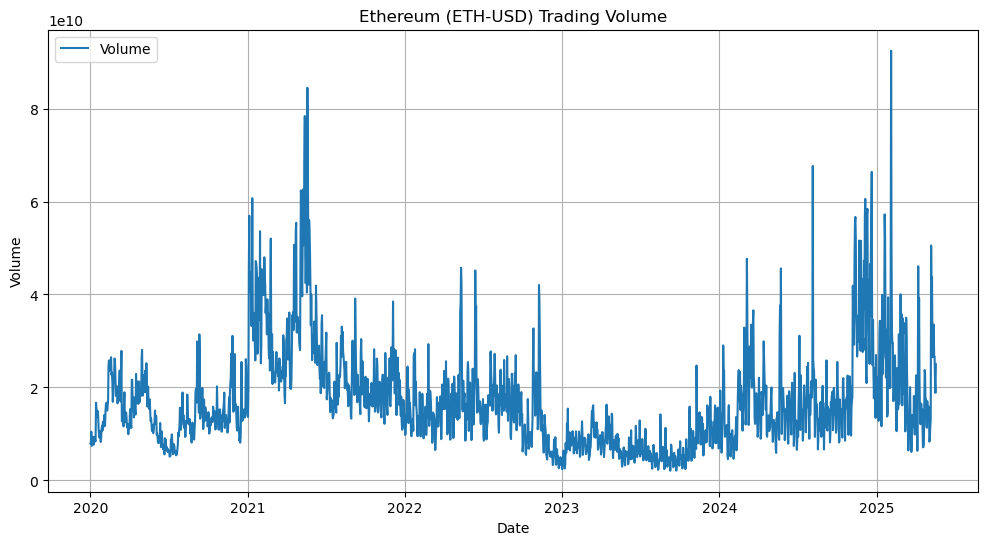

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(df["Volume"], label="Volume")
plt.title("Ethereum (ETH-USD) Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.savefig("volume.png")
plt.show()

In [ ]:
# 3. Statistical Summaries:

In [25]:
summary = df[["Close", "Volume"]].describe()
print(summary)
# Save to CSV for report
summary.to_csv("stat_summary.csv")

Price         Close        Volume
Ticker      ETH-USD       ETH-USD
count   1965.000000  1.965000e+03
mean    2011.710005  1.707932e+10
std     1123.783933  1.073974e+10
min      110.605873  2.081626e+09
25%     1299.946411  9.774452e+09
50%     1890.513550  1.490170e+10
75%     2888.929688  2.117277e+10
max     4812.087402  9.245355e+10


# Step 3: Stationarity Testing

In [30]:
from statsmodels.tsa.stattools import adfuller

# ADF test on Close price
result = adfuller(df["Close"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -2.2333126571297988
p-value: 0.19437774983454287
Critical Values: {'1%': -3.4336941745418956, '5%': -2.8630172588634664, '10%': -2.5675564323938564}


2. Differencing: 
If p-value > 0.05, the series is non-stationary. Apply differencing.

# Step 4: ARIMA Model Development

<Figure size 1200x400 with 0 Axes>

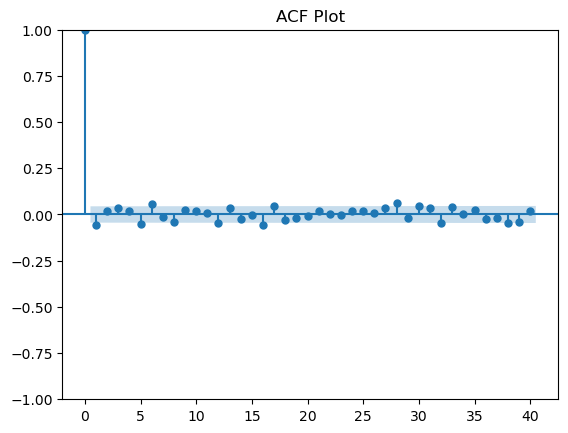

<Figure size 1200x400 with 0 Axes>

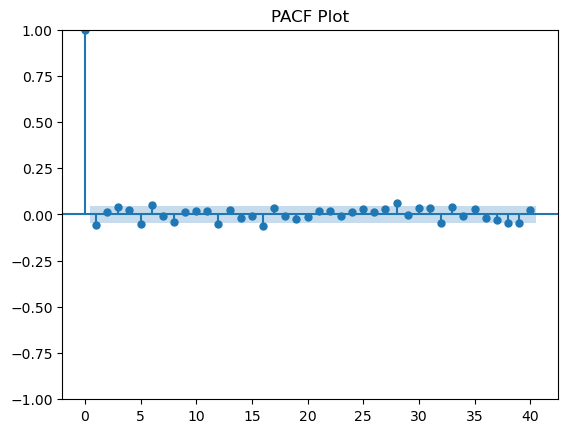

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF for differenced series
plt.figure(figsize=(12, 4))
plot_acf(df["Close_diff"].dropna(), lags=40)
plt.title("ACF Plot")
plt.savefig("acf_plot.png")
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(df["Close_diff"].dropna(), lags=40)
plt.title("PACF Plot")
plt.savefig("pacf_plot.png")
plt.show()
# Interpretation: Significant lags in ACF suggest q (MA), in PACF suggest p (AR). For example, if PACF cuts off after lag 1, try p=1.

In [43]:
from pmdarima import auto_arima

# Auto ARIMA
model_auto = auto_arima(df["Close"], seasonal=False, trace=True, stepwise=True)
print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23421.115, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23416.290, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23416.550, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23419.439, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23417.815, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23418.079, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23418.347, Time=1.21 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=23414.654, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=23416.167, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=23416.434, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=23414.913, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=23416.668, Time=0.67 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 5.976 seconds
               

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                ETH-USD   No. Observations:                 1965
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11705.217
Date:                Mon, 19 May 2025   AIC                          23416.434
Time:                        11:54:10   BIC                          23433.182
Sample:                    01-01-2020   HQIC                         23422.589
                         - 05-18-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1840      0.220     -0.835      0.404      -0.616       0.248
ma.L1          0.1252      0.223      0.561      0.575      -0.312       0.563
sigma2      8811.8209    124.806     70.604      0.0

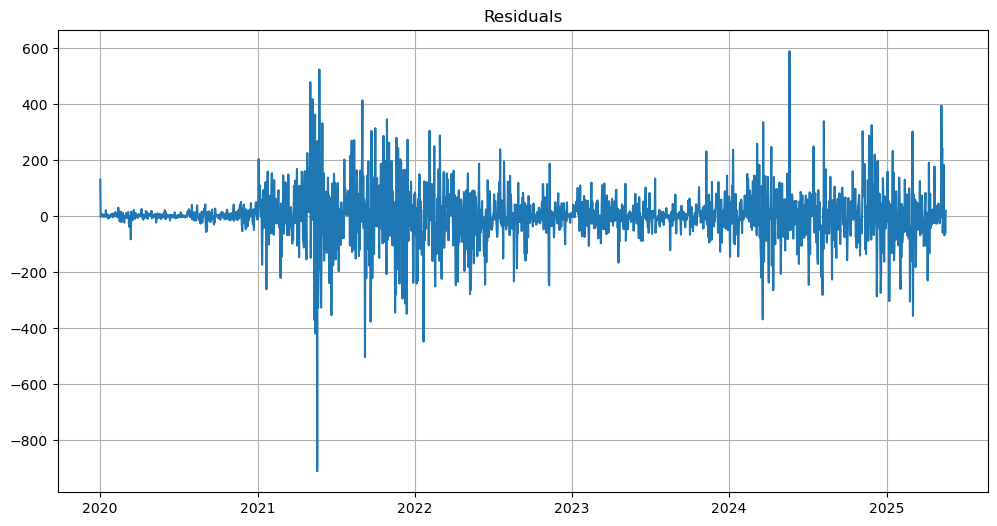

In [47]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (example: p=1, d=1, q=1)
model = ARIMA(df["Close"], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title("Residuals")
plt.grid(True)
plt.savefig("residuals.png")
plt.show()

# Step 5: Model Evaluation

In [68]:
train_size = int(len(df) * 0.8)
train, test = df["Close"][:train_size], df["Close"][train_size:]

# Refit model on train data
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 702.26
MAPE: 0.2455


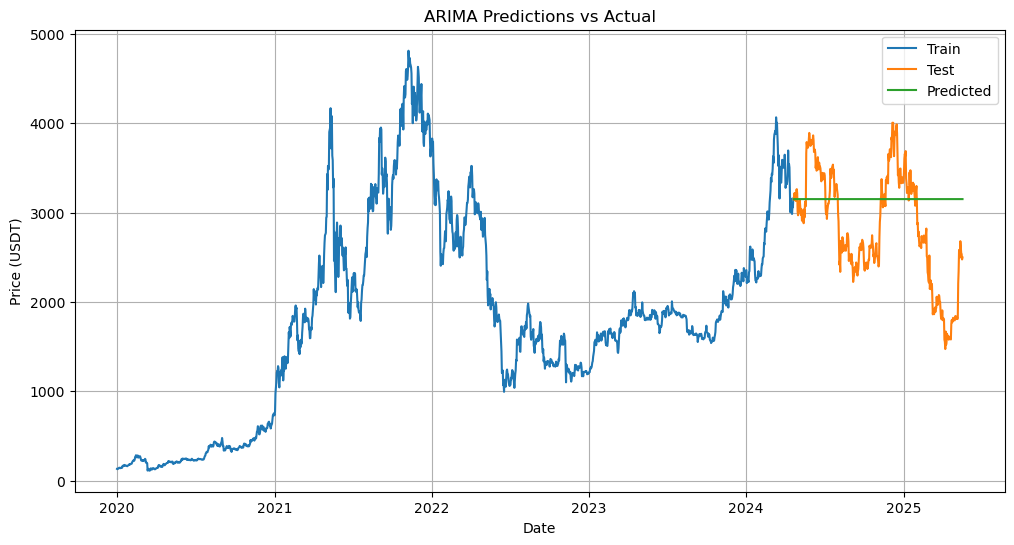

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast)
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(12, 6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast, label="Predicted")
plt.title("ARIMA Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.legend()
plt.grid(True)
plt.savefig("predictions.png")
plt.show()

# Step 6: Forecasting & Visualization

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


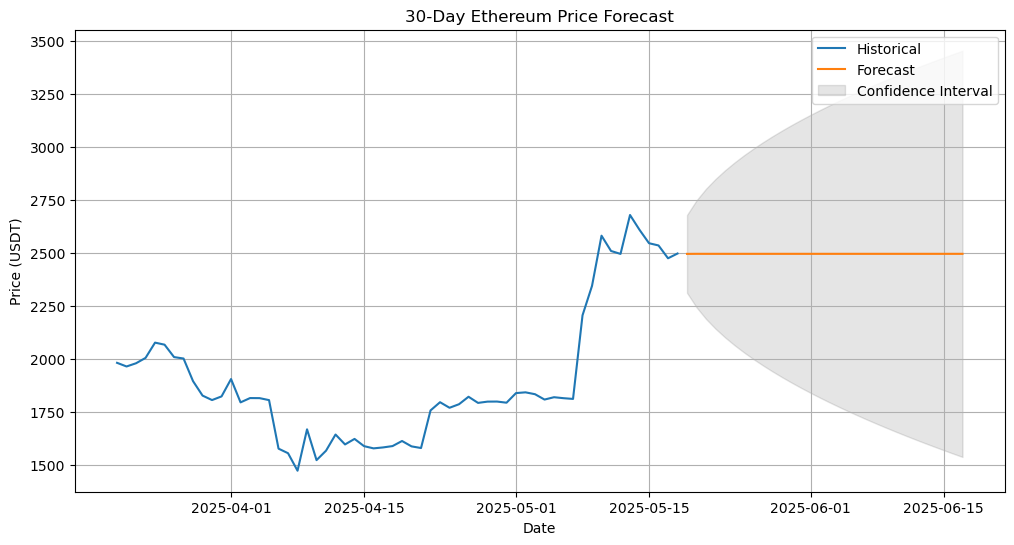

In [58]:
# Fit model on full data
model = ARIMA(df["Close"], order=(1, 1, 1))
model_fit = model.fit()

# Forecast 30 days
forecast_obj = model_fit.get_forecast(steps=30)
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()

# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq="D")
forecast_series = pd.Series(forecast, index=future_dates)
conf_int.index = future_dates

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df["Close"][-60:], label="Historical")
plt.plot(forecast_series, label="Forecast")
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="k", alpha=0.1, label="Confidence Interval")
plt.title("30-Day Ethereum Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.legend()
plt.grid(True)
plt.savefig("forecast.png")
plt.show()